In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Load Netflix dataset
df = pd.read_csv("C:/Users/pbn35/OneDrive/archive (6)/netflix_titles.csv")

# Preview the first few rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [15]:
# Check column info and nulls
df.info()

# Strip leading/trailing whitespace from all string columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].map(lambda x: x.strip() if isinstance(x, str) else x)

<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8797 non-null   object        
 1   type          8797 non-null   object        
 2   title         8797 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7972 non-null   object        
 5   country       7967 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8797 non-null   int64         
 8   rating        8793 non-null   object        
 9   duration      8794 non-null   object        
 10  listed_in     8797 non-null   object        
 11  description   8797 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 893.4+ KB


In [16]:
# Drop rows where 'date_added' is NaN
df.dropna(subset=['date_added'], inplace=True)

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Drop rows that still couldn't be parsed
df.dropna(subset=['date_added'], inplace=True)

In [17]:
# Extract year and month added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Display processed date columns
df[['title', 'date_added', 'year_added', 'month_added']].head()

,title,date_added,year_added,month_added
0,Dick Johnson Is Dead,2021-09-25,2021,9
1,Blood & Water,2021-09-24,2021,9
2,Ganglands,2021-09-24,2021,9
3,Jailbirds New Orleans,2021-09-24,2021,9
4,Kota Factory,2021-09-24,2021,9


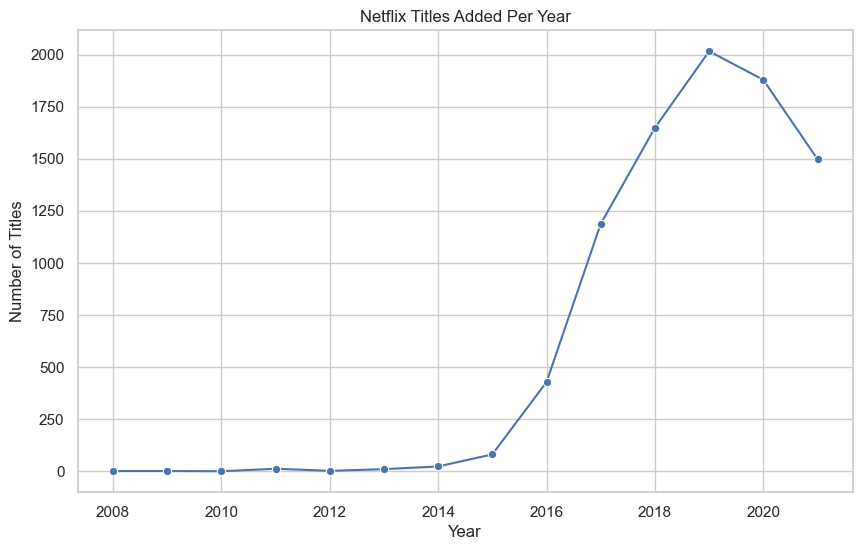

In [18]:
# Count number of shows/movies added each year
yearly_counts = df['year_added'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o')
plt.title("Netflix Titles Added Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()

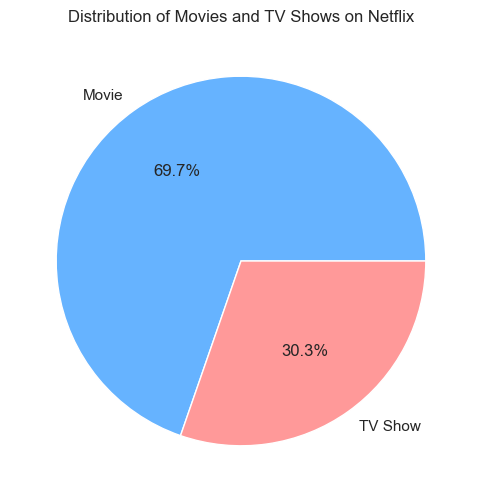

In [19]:
# Count types of content
type_counts = df['type'].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title("Distribution of Movies and TV Shows on Netflix")
plt.show()

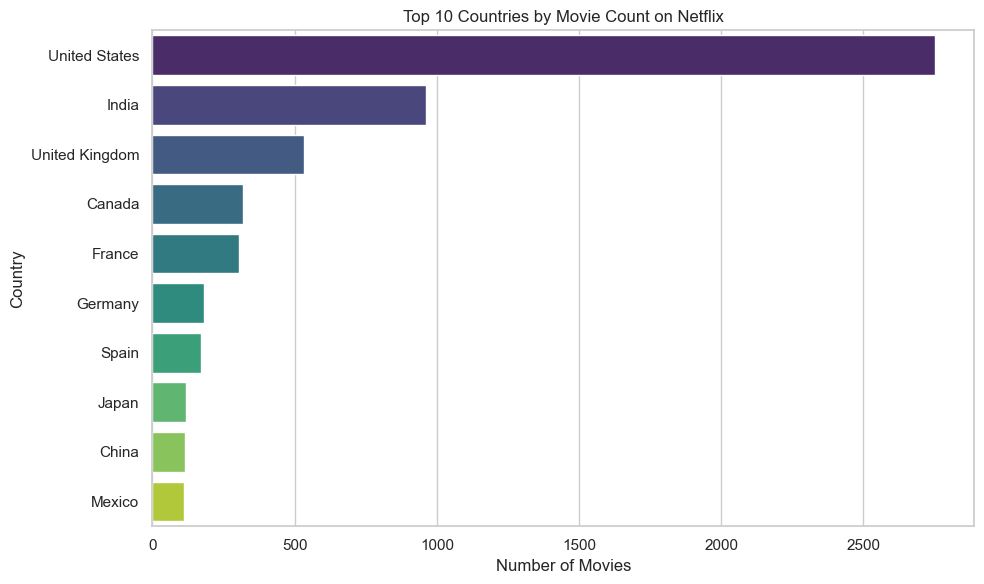

In [22]:
# Filter only movies
movies_df = df[df['type'] == 'Movie']

# Split countries if multiple are listed per title
country_split = movies_df['country'].dropna().str.split(', ')

# Flatten the list and count
from collections import Counter
flat_countries = [country for sublist in country_split for country in sublist]
country_counts = Counter(flat_countries)

# Convert to DataFrame
country_df = pd.DataFrame(country_counts.items(), columns=['Country', 'Movie_Count'])
top_countries = country_df.sort_values(by='Movie_Count', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_countries, x='Movie_Count', y='Country', hue='Country', palette='viridis', dodge=False, legend=False)
plt.title("Top 10 Countries by Movie Count on Netflix")
plt.xlabel("Number of Movies")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

C:\Users\pbn35\AppData\Local\Temp\ipykernel_27464\3910654492.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country['main_country'] = df_country['country'].apply(lambda x: x.split(',')[0].strip())


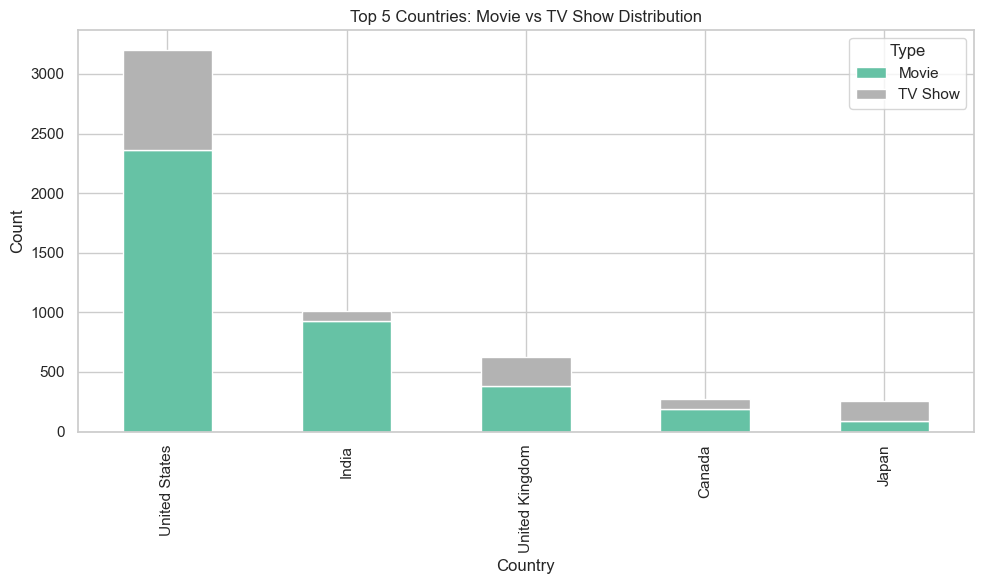

In [21]:
# Drop nulls
df_country = df.dropna(subset=['country'])

# Use first country listed only (for simplicity)
df_country['main_country'] = df_country['country'].apply(lambda x: x.split(',')[0].strip())

# Group by country and type
type_by_country = df_country.groupby(['main_country', 'type']).size().unstack().fillna(0)

# Get top 5 countries by total titles
top_5 = type_by_country.sum(axis=1).sort_values(ascending=False).head(5).index
top_5_data = type_by_country.loc[top_5]

# Plot
top_5_data.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title("Top 5 Countries: Movie vs TV Show Distribution")
plt.xlabel("Country")
plt.ylabel("Count")
plt.legend(title="Type")
plt.tight_layout()
plt.show()

C:\Users\pbn35\AppData\Local\Temp\ipykernel_27464\3749600493.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_counts, x='Count', y='Genre', palette='coolwarm')


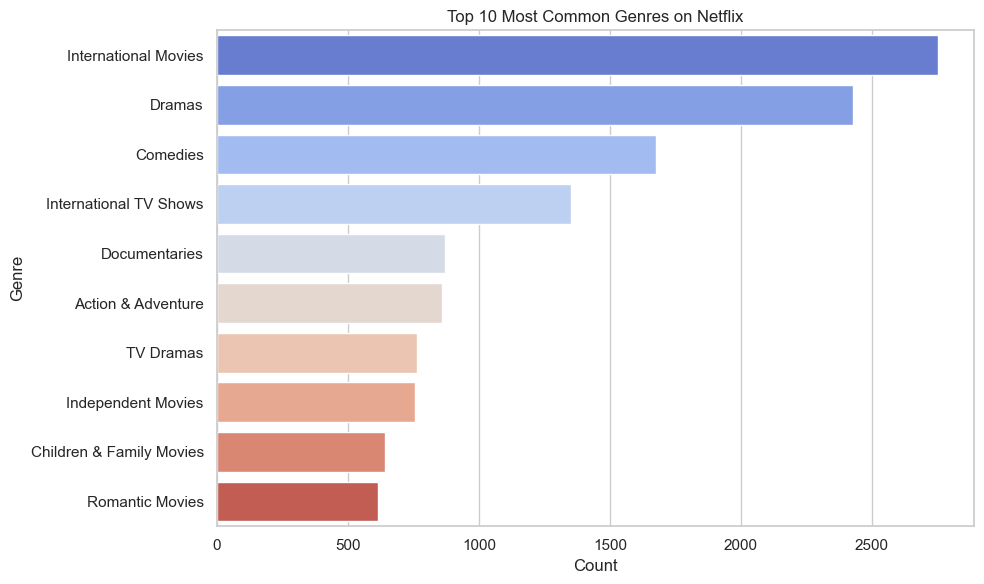

In [23]:
# Split and flatten genres
genre_split = df['listed_in'].dropna().str.split(', ')
flat_genres = [genre for sublist in genre_split for genre in sublist]

# Count and convert to DataFrame
genre_counts = pd.DataFrame(Counter(flat_genres).most_common(10), columns=['Genre', 'Count'])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=genre_counts, x='Count', y='Genre', palette='coolwarm')
plt.title("Top 10 Most Common Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()